In [33]:
import cv2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy import signal
import math

# Processing of the resample image

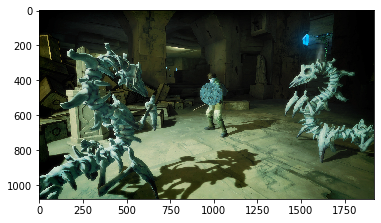

In [34]:
im_file = "./original.jpg"
im = cv2.imread(im_file)
plt.imshow(im)

(1080, 1920)


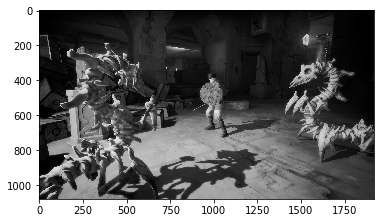

In [35]:
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
print(im.shape)
plt.imshow(im, cmap='gray')

In [36]:
dx, dy = cv2.spatialGradient(im)
print(dx.shape)
print(np.min(dx))
print(np.max(dx))
print(np.min(dy))
print(np.max(dy))

(1080, 1920)
-941
979
-966
972


True

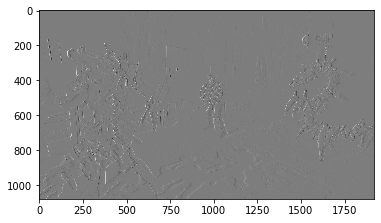

In [37]:
plt.imshow(dx, cmap='gray')
cv2.imwrite("./original/im_dx.jpg", dx)

True

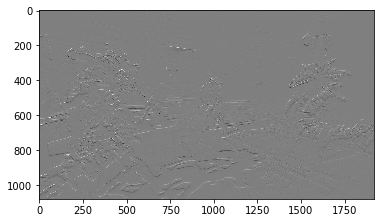

In [38]:
plt.imshow(dy, cmap='gray')
cv2.imwrite("./original/im_dy.jpg", dy)

True

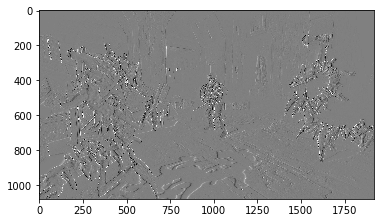

In [39]:
dx_amp = dx * 100
plt.imshow(dx_amp, cmap='gray')
cv2.imwrite("./original/im_dx_amp.jpg", dx_amp)

True

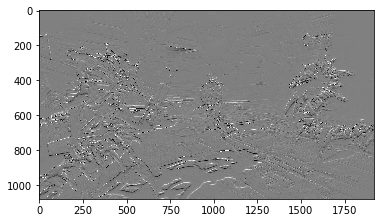

In [40]:
dy_amp = dy * 100
plt.imshow(dy_amp, cmap='gray')
cv2.imwrite("./original/im_dy_amp.jpg", dy_amp)

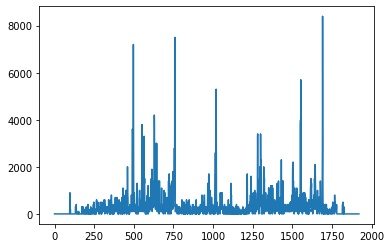

In [41]:
plt.plot(abs(dx_amp[40]))
plt.savefig("./original/dx_amp[40]")

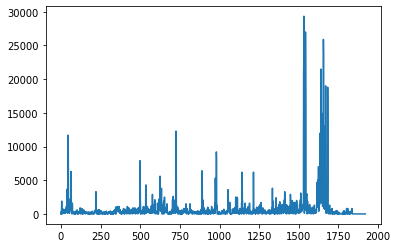

In [42]:
plt.plot(abs(dx_amp[140]))
plt.savefig("./original/dx_amp[140]")

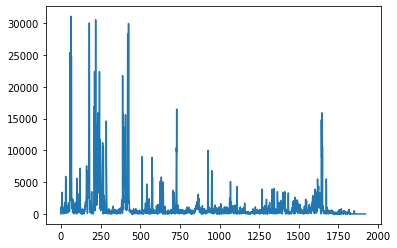

In [43]:
plt.plot(abs(dx_amp[240]))
plt.savefig("./original/dx_amp[240]")

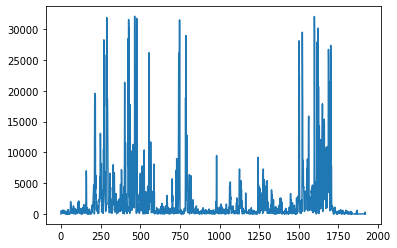

In [44]:
plt.plot(abs(dx_amp[340]))
plt.savefig("./original/dx_amp[340]")

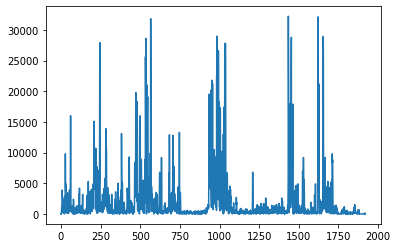

In [45]:
# In the area of high resolution
plt.plot(abs(dx_amp[440]))
plt.savefig("./original/dx_amp[440]")

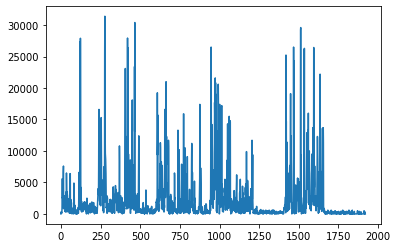

In [46]:
# In the area of high resolution
plt.plot(abs(dx_amp[540]))
plt.savefig("./original/dx_amp[540]")

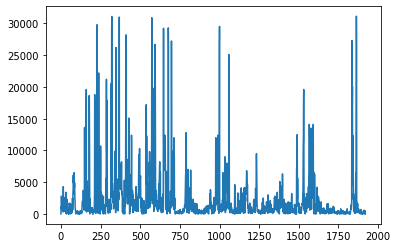

In [47]:
# In the area of high resolution
plt.plot(abs(dx_amp[640]))
plt.savefig("./original/dx_amp[640]")

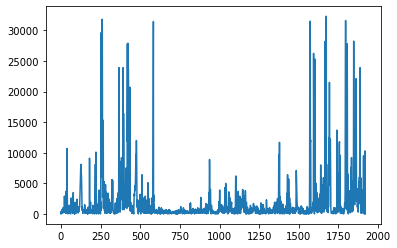

In [48]:
plt.plot(abs(dx_amp[740]))
plt.savefig("./original/dx_amp[740]")

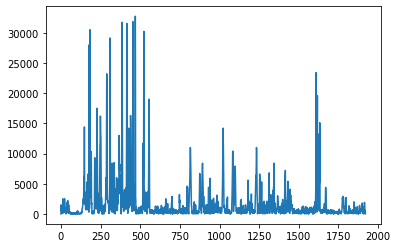

In [49]:
plt.plot(abs(dx_amp[840]))
plt.savefig("./original/dx_amp[840]")

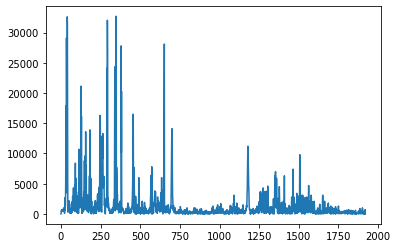

In [50]:
plt.plot(abs(dx_amp[940]))
plt.savefig("./original/dx_amp[940]")

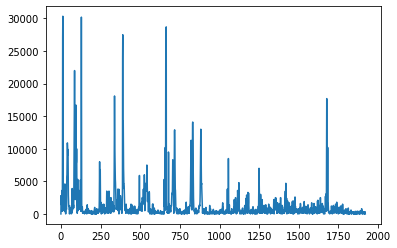

In [51]:
plt.plot(abs(dx_amp[1040]))
plt.savefig("./original/dx_amp[1040]")

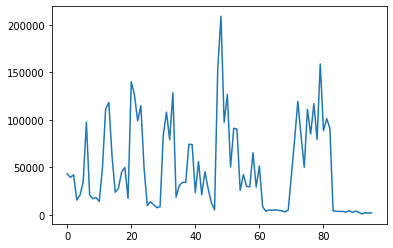

In [62]:
interval = 20
list = []
sum = 0
for i in range(1920):
    sum += abs(dx_amp[540][i])
    if (i % interval == (interval - 1)):
        list.append(sum)
        sum = 0
plt.plot(list)

# Comparison of average gradient intensity in high/low resolution area

In [27]:
print(dx_amp.shape)
print(dy_amp.shape)

(1080, 1920)
(1080, 1920)


In [28]:
ct_low_x = 0
ct_high_x = 0

sum_low_x = 0
sum_high_x = 0

for i in range(1080):
    for j in range(1920):
        if ((i in range(405, 675)) and (j in range(720, 1200))):
            ct_high_x += 1
            sum_high_x += abs(dx_amp[i][j])
        else:
            ct_low_x += 1
            sum_low_x += abs(dx_amp[i][j])

In [29]:
avg_intensity_low_x = sum_low_x / ct_low_x
avg_intensity_high_x = sum_high_x / ct_high_x
print(avg_intensity_low_x)
print(avg_intensity_high_x)

1617.5068395061728
2174.5445061728396


In [30]:
ct_low_y = 0
ct_high_y = 0

sum_low_y = 0
sum_high_y = 0

for i in range(1080):
    for j in range(1920):
        if ((i in range(405, 675)) and (j in range(720, 1200))):
            ct_high_y += 1
            sum_high_y += abs(dy_amp[i][j])
        else:
            ct_low_y += 1
            sum_low_y += abs(dy_amp[i][j])

In [31]:
avg_intensity_low_y = sum_low_y / ct_low_y
avg_intensity_high_y = sum_high_y / ct_high_y
print(avg_intensity_low_y)
print(avg_intensity_high_y)

1987.9033621399176
2472.2928395061726


In [32]:
print(avg_intensity_high_x / avg_intensity_low_x)
print(avg_intensity_high_y / avg_intensity_low_y)

1.3443804088251838
1.2436685236272373


[2453.54761905 1580.14657005 1478.57012346 1621.0693194 ]


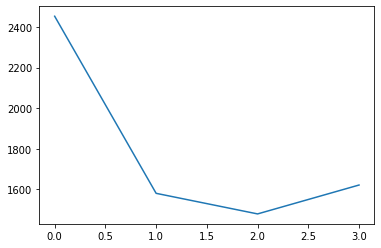

In [63]:
ct = np.array([0, 0, 0, 0])
sum = np.array([0, 0, 0, 0])
w = 30

for i in range(1080):
    for j in range(1920):
        if ((i in range(405 + w, 675 - w)) and (j in range(720 + w, 1200 - w))):
            ct[0] += 1
            sum[0] += abs(dx_amp[i][j])
        elif ((i in range(405, 675)) and (j in range(720, 1200))):
            ct[1] += 1
            sum[1] += abs(dx_amp[i][j])
        elif ((i in range(405 - w, 675 + w)) and (j in range(720 - w, 1200 + w))):
            ct[2] += 1
            sum[2] += abs(dx_amp[i][j])
        else:
            ct[3] += 1
            sum[3] += abs(dx_amp[i][j])
avg = sum / ct
print(avg)
plt.plot(avg)

[2262.4907684  1291.96662125 1671.7868799  1617.16245838]


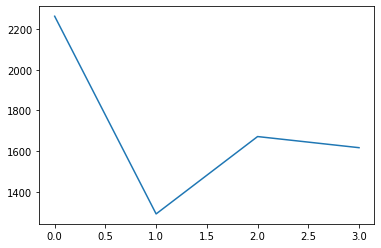

In [64]:
ct = np.array([0, 0, 0, 0])
sum = np.array([0, 0, 0, 0])
w = 8

for i in range(1080):
    for j in range(1920):
        if ((i in range(405 + w, 675 - w)) and (j in range(720 + w, 1200 - w))):
            ct[0] += 1
            sum[0] += abs(dx_amp[i][j])
        elif ((i in range(405, 675)) and (j in range(720, 1200))):
            ct[1] += 1
            sum[1] += abs(dx_amp[i][j])
        elif ((i in range(405 - w, 675 + w)) and (j in range(720 - w, 1200 + w))):
            ct[2] += 1
            sum[2] += abs(dx_amp[i][j])
        else:
            ct[3] += 1
            sum[3] += abs(dx_amp[i][j])
avg = sum / ct
print(avg)
plt.plot(avg)